# Labor Projections for 2018-2028 (Electricians)

In [1]:
#Import my packages that I will or might not use. Doesn't hurt to be safe.
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import randn
import seaborn as sns
%matplotlib inline

In [2]:
#Import my data which I pulled from data.gov. This data set is about labor projections from 2018 to 2028 for the state of New York.
df=pd.read_csv('Long_Term_Occupational_Projections.csv')

In [3]:
#Wanted to view the columns and first few rows of my dataframe
df.head()

,Area,Period,SOC,Occupation Title,Base Year,Projected Year,Change,Percent,Total Annual Openings,Growth Annual Openings,Replacement Annual Openings
0,New York State,2018 - 2028,'00-0000,"Total, All Occupations",10489880,11577400,1087520,10.4,1345500,108750,1236750
1,New York State,2018 - 2028,'11-0000,Management Occupations,625980,698130,72150,11.5,62620,7220,55410
2,New York State,2018 - 2028,'11-1000,Top Executives,190130,206740,16610,8.7,18590,1660,16920
3,New York State,2018 - 2028,'11-1011,Chief Executives,14480,14290,-190,-1.3,1000,-20,1020
4,New York State,2018 - 2028,'11-1021,General and Operations Managers,168650,184880,16230,9.6,16970,1620,15350


In [4]:
#I wanted to drop these columns because I did not see no use for them further in my analysis.
df=df.drop("SOC",axis=1)
df=df.drop("Base Year",axis=1)

In [5]:
#I wanted to make sure that code had reflected what I had ran it to do in the previous cell.
df.head()

,Area,Period,Occupation Title,Projected Year,Change,Percent,Total Annual Openings,Growth Annual Openings,Replacement Annual Openings
0,New York State,2018 - 2028,"Total, All Occupations",11577400,1087520,10.4,1345500,108750,1236750
1,New York State,2018 - 2028,Management Occupations,698130,72150,11.5,62620,7220,55410
2,New York State,2018 - 2028,Top Executives,206740,16610,8.7,18590,1660,16920
3,New York State,2018 - 2028,Chief Executives,14290,-190,-1.3,1000,-20,1020
4,New York State,2018 - 2028,General and Operations Managers,184880,16230,9.6,16970,1620,15350


In [6]:
#I wanted to create a seperate dataframe for total all occupations.
df2=df.loc[df['Occupation Title']=='Total, All Occupations']

In [7]:
#I wanted to check to see if it had applied to the dataframe.
df2.head()

,Area,Period,Occupation Title,Projected Year,Change,Percent,Total Annual Openings,Growth Annual Openings,Replacement Annual Openings
0,New York State,2018 - 2028,"Total, All Occupations",11577400,1087520,10.4,1345500,108750,1236750
796,Capital Region,2018 - 2028,"Total, All Occupations",661840,54660,9.0,75972,5466,70500
1418,Central Region,2018 - 2028,"Total, All Occupations",431810,36940,9.4,50377,3694,46690
1982,Finger Lakes,2018 - 2028,"Total, All Occupations",701960,60560,9.4,81618,6056,75560
2614,Hudson Valley,2018 - 2028,"Total, All Occupations",1149670,105980,10.2,135172,10598,124580


In [8]:
# I wanted to manually drop these rows that contained information on Total, all occupations that were not NYC or NYS.
df2=df2.drop([796,1418,1982,2614],axis=0)

df2=df2.drop([3187,3820,4942],axis=0)

df2=df2.drop([5459,6001],axis=0)

In [9]:
#This is how I wanted the data to look.
df2.head()

,Area,Period,Occupation Title,Projected Year,Change,Percent,Total Annual Openings,Growth Annual Openings,Replacement Annual Openings
0,New York State,2018 - 2028,"Total, All Occupations",11577400,1087520,10.4,1345500,108750,1236750
4304,New York City,2018 - 2028,"Total, All Occupations",5543240,603790,12.2,641095,60379,580720


In [10]:
# I wanted to see if any of the columns in the data did not have the data type I wanted.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6628 entries, 0 to 6627
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area                         6628 non-null   object 
 1   Period                       6628 non-null   object 
 2   Occupation Title             6628 non-null   object 
 3   Projected Year               6628 non-null   int64  
 4   Change                       6628 non-null   int64  
 5   Percent                      6628 non-null   float64
 6   Total Annual Openings        6628 non-null   int64  
 7   Growth Annual Openings       6628 non-null   int64  
 8   Replacement Annual Openings  6628 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 466.2+ KB


In [11]:
#I wanted to create a new data frame only focusing on nyc so I could pull Electrician into a new dataframe.
df3=df.loc[df['Area']=='New York City']

In [12]:
#Viewing my dataframe after it has been sliced.
df3.head()

,Area,Period,Occupation Title,Projected Year,Change,Percent,Total Annual Openings,Growth Annual Openings,Replacement Annual Openings
4304,New York City,2018 - 2028,"Total, All Occupations",5543240,603790,12.2,641095,60379,580720
4305,New York City,2018 - 2028,Management Occupations,370710,38680,11.6,33232,3868,29360
4306,New York City,2018 - 2028,Top Executives,100850,8290,9.0,9126,829,8290
4307,New York City,2018 - 2028,General and Operations Managers,94460,8370,9.7,8676,837,7840
4308,New York City,2018 - 2028,"Advertising, Marketing, Promotions, Public Rel...",43660,3690,9.2,4098,369,3730


In [13]:
#I did a loc function to select any row that contained the value, Electricians, in the occupation titles column.
df4=df3.loc[df['Occupation Title']=='Electricians']

In [14]:
#This is what I wanted my data to look like
df4.head()

,Area,Period,Occupation Title,Projected Year,Change,Percent,Total Annual Openings,Growth Annual Openings,Replacement Annual Openings
4806,New York City,2018 - 2028,Electricians,23180,1850,8.7,2764,185,2580


In [15]:
#I wanted some more data to attempt to create a linear relationship. So I wanted to see if the use of electricity in nyc might be the cause of percent change in projected jobs in the next 10 years.
df5=pd.read_csv('Electric_Consumption_And_Cost__2010_-_April_2020_.csv',low_memory=False)

In [16]:
# I wanted to look at the data types.
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362630 entries, 0 to 362629
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    361947 non-null  object 
 1   Borough             362630 non-null  object 
 2   Account Name        362630 non-null  object 
 3   Location            353112 non-null  object 
 4   Meter AMR           362476 non-null  object 
 5   Meter Scope         19106 non-null   object 
 6   TDS #               360690 non-null  float64
 7   EDP                 362630 non-null  int64  
 8   RC Code             362630 non-null  object 
 9   Funding Source      362630 non-null  object 
 10  AMP #               360744 non-null  object 
 11  Vendor Name         362630 non-null  object 
 12  UMIS BILL ID        362630 non-null  int64  
 13  Revenue Month       362630 non-null  object 
 14  Service Start Date  362622 non-null  object 
 15  Service End Date    362622 non-nul

In [17]:
#I wanted to look a the ccolumn names and what ever information I could possibly use to make a connection.
df5.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,"15,396.82",GOV/NYC/068,Yes,"128,800","7,387.97",216,"2,808","5,200.85"
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,"14,556.34",GOV/NYC/068,Yes,"115,200","6,607.87",224,"2,912","5,036.47"
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,"13,904.98",GOV/NYC/068,Yes,"103,200","5,919.55",216,"2,808","5,177.43"
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,"14,764.04",GOV/NYC/068,Yes,"105,600","6,057.22",208,"2,704","6,002.82"
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,"13,729.54",GOV/NYC/068,Yes,"97,600","5,598.34",216,"2,808","5,323.2"


In [18]:
#I wanted to change the datatype for this column because I wanted to utilize it for my graph. So I converted it to a date time data type.
df5['Service End Date'] = pd.DatetimeIndex(df5['Service End Date']).year

In [19]:
# I converted this column to a numeric data type.
df5["Consumption (KWH)"] = pd.to_numeric(df5["Consumption (KWH)"],errors='ignore')

In [20]:
# I wanted to see if the code had processed correctly.
df5['Service End Date'].value_counts()

2020.0    54382
2016.0    40792
2015.0    40499
2014.0    39838
2019.0    38799
2013.0    38534
2017.0    38482
2012.0    35207
2010.0    29267
2021.0     6814
2018.0        7
2011.0        1
Name: Service End Date, dtype: int64

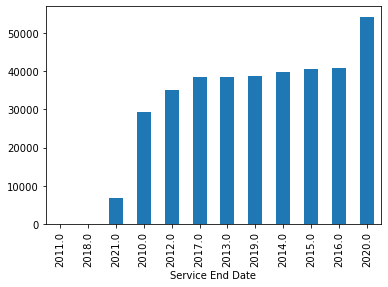

In [21]:
# I had created a bar graph with the x label being the year and the y label being the usage throughout those years.
#As you can see the usage per year is increasing from 2010 to 2020. The first bars on the graph I wouldn't include in my conclusion, possibly because of missing or null information.
df6=df5.groupby(['Service End Date'])['Consumption (KWH)'].count().sort_values(ascending=True).plot(kind='bar')

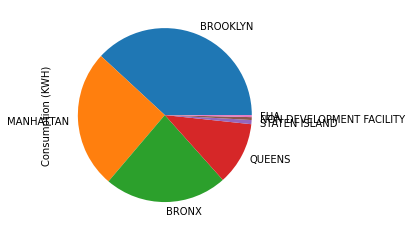

In [22]:
Pie_chart=df5.groupby(['Borough'])['Consumption (KWH)'].count().sort_values(ascending=False).plot(kind='pie')
#I was curious as to where the most usage was coming from and that would be Brooklyn. So I can assume that the highest location of jobs for an electrician or the majority of number of assignments would be in Brooklyn.

In [23]:
#Going back to Labor projections, I wanted to clean the dataframe to find information regarding electricians all around NYS.
df8=df.loc[df['Occupation Title']=='Electricians']

In [24]:
#Viewing dataframe
df8

,Area,Period,Occupation Title,Projected Year,Change,Percent,Total Annual Openings,Growth Annual Openings,Replacement Annual Openings
581,New York State,2018 - 2028,Electricians,49760,4440,9.8,5950,440,5510
1286,Capital Region,2018 - 2028,Electricians,2530,200,8.6,301,20,290
1857,Central Region,2018 - 2028,Electricians,1750,140,8.7,209,14,190
2468,Finger Lakes,2018 - 2028,Electricians,2750,230,9.1,329,23,300
3061,Hudson Valley,2018 - 2028,Electricians,5030,570,12.8,607,57,550
3672,Long Island,2018 - 2028,Electricians,8470,840,11.0,1017,84,940
4200,Mohawk Valley,2018 - 2028,Electricians,530,40,8.2,63,4,60
4806,New York City,2018 - 2028,Electricians,23180,1850,8.7,2764,185,2580
5344,North Country,2018 - 2028,Electricians,1020,90,9.7,121,9,110
5884,Southern Tier,2018 - 2028,Electricians,1310,100,8.3,156,10,150


In [25]:
#I used this code to merge the dataframes from all occupations and the ones on just electricians
frames=[df2,df8]
df9=pd.concat(frames)

In [26]:
#Viewing the dataframe
df9

,Area,Period,Occupation Title,Projected Year,Change,Percent,Total Annual Openings,Growth Annual Openings,Replacement Annual Openings
0,New York State,2018 - 2028,"Total, All Occupations",11577400,1087520,10.4,1345500,108750,1236750
4304,New York City,2018 - 2028,"Total, All Occupations",5543240,603790,12.2,641095,60379,580720
581,New York State,2018 - 2028,Electricians,49760,4440,9.8,5950,440,5510
1286,Capital Region,2018 - 2028,Electricians,2530,200,8.6,301,20,290
1857,Central Region,2018 - 2028,Electricians,1750,140,8.7,209,14,190
2468,Finger Lakes,2018 - 2028,Electricians,2750,230,9.1,329,23,300
3061,Hudson Valley,2018 - 2028,Electricians,5030,570,12.8,607,57,550
3672,Long Island,2018 - 2028,Electricians,8470,840,11.0,1017,84,940
4200,Mohawk Valley,2018 - 2028,Electricians,530,40,8.2,63,4,60
4806,New York City,2018 - 2028,Electricians,23180,1850,8.7,2764,185,2580


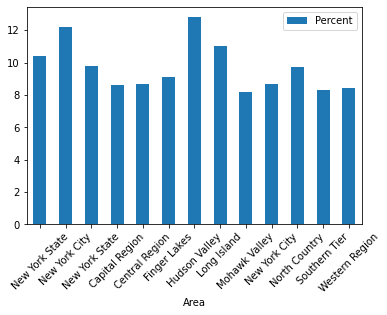

In [27]:
#Creating a bar graph I can see the many counties average increase against state averages.
df10=df9.plot.bar(x='Area', y='Percent', rot=45)


# There is a steady increase in electrical usage in NYC since 2010. Increasing usage at a steady pace is most likely the reason why labor projections for the occupational title of Electrician is around the same as the state average. From the other visualization I can deduce that the deman for electricians or the majority of job assignemnts would be located in Brooklyn.